## Handling Overfitting with CIFAR-10

### Step 1: Import Libraries & Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values (0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (CIFAR-10 is 32x32x3 = 3072 features)
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# One-hot encode labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step 
Training data shape: (50000, 3072)
Test data shape: (10000, 3072)


### Step 2: Baseline Model

In [3]:
def create_baseline_model():
    model = models.Sequential([
        layers.Dense(512, activation="relu", input_shape=(3072,)),
        layers.Dense(256, activation="relu"),
        layers.Dense(num_classes, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

baseline_model = create_baseline_model()
history_baseline = baseline_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=30, batch_size=128, verbose=1
)

C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.3203 - loss: 1.9017 - val_accuracy: 0.3905 - val_loss: 1.7012
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.3993 - loss: 1.6869 - val_accuracy: 0.4203 - val_loss: 1.6164
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.4291 - loss: 1.6028 - val_accuracy: 0.4397 - val_loss: 1.5740
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.4512 - loss: 1.5390 - val_accuracy: 0.4552 - val_loss: 1.5288
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.4686 - loss: 1.4925 - val_accuracy: 0.4642 - val_loss: 1.5129
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.4823 - loss: 1.4582 - val_accuracy: 0.4798 - val_loss: 1.4595
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.4942 - loss: 1.4182 - val_accuracy: 0.4792 - val_loss: 1.4595
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.5043 - loss: 1.3948 - 

### Step 3: Add Dropout Regularization

In [4]:
def create_dropout_model():
    model = models.Sequential([
        layers.Dense(512, activation="relu", input_shape=(3072,)),
        layers.Dropout(0.5),  # Dropout added
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

dropout_model = create_dropout_model()
history_dropout = dropout_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=30, batch_size=128, verbose=1
)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.1851 - loss: 2.1544 - val_accuracy: 0.2826 - val_loss: 1.9563
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.2166 - loss: 2.0523 - val_accuracy: 0.3060 - val_loss: 1.9467
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.2329 - loss: 2.0174 - val_accuracy: 0.2980 - val_loss: 1.9395
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.2420 - loss: 2.0001 - val_accuracy: 0.3271 - val_loss: 1.9495
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.2432 - loss: 1.9986 - val_accuracy: 0.3015 - val_loss: 1.9650
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.2462 - loss: 1.9898 - val_accuracy: 0.2895 - val_loss: 1.9600
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.2481 - loss: 1.9790 - val_accuracy: 0.2968 - val_loss: 1.9507
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.2537 - loss: 1.9789 - 

### Step 4: Early Stopping

In [5]:
early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

early_model = create_baseline_model()
history_early = early_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50, batch_size=128, verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.3170 - loss: 1.9181 - val_accuracy: 0.3913 - val_loss: 1.7116
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.3961 - loss: 1.6925 - val_accuracy: 0.4184 - val_loss: 1.6303
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.4290 - loss: 1.6059 - val_accuracy: 0.4234 - val_loss: 1.5831
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.4518 - loss: 1.5406 - val_accuracy: 0.4582 - val_loss: 1.5243
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.4689 - loss: 1.4926 - val_accuracy: 0.4722 - val_loss: 1.4907
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.4800 - loss: 1.4580 - val_accuracy: 0.4537 - val_loss: 1.5535
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.4915 - loss: 1.4272 - val_accuracy: 0.4896 - val_loss: 1.4327
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.5042 - loss: 1.3993 - 

### Step 5: Weight Decay (L2 Regularization)

In [6]:
def create_l2_model():
    model = models.Sequential([
        layers.Dense(512, activation="relu", input_shape=(3072,),
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(256, activation="relu",
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(num_classes, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

l2_model = create_l2_model()
history_l2 = l2_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=30, batch_size=128, verbose=1
)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.3161 - loss: 2.4091 - val_accuracy: 0.3288 - val_loss: 2.0830
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.3917 - loss: 1.8914 - val_accuracy: 0.4217 - val_loss: 1.7803
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.4161 - loss: 1.7598 - val_accuracy: 0.4331 - val_loss: 1.7209
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.4329 - loss: 1.7056 - val_accuracy: 0.4519 - val_loss: 1.6529
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.4425 - loss: 1.6691 - val_accuracy: 0.4587 - val_loss: 1.6277
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.4564 - loss: 1.6314 - val_accuracy: 0.4555 - val_loss: 1.6279
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.4621 - loss: 1.6121 - val_accuracy: 0.4506 - val_loss: 1.6338
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.4674 - loss: 1.5983 - 

### Step 6: Compare Results

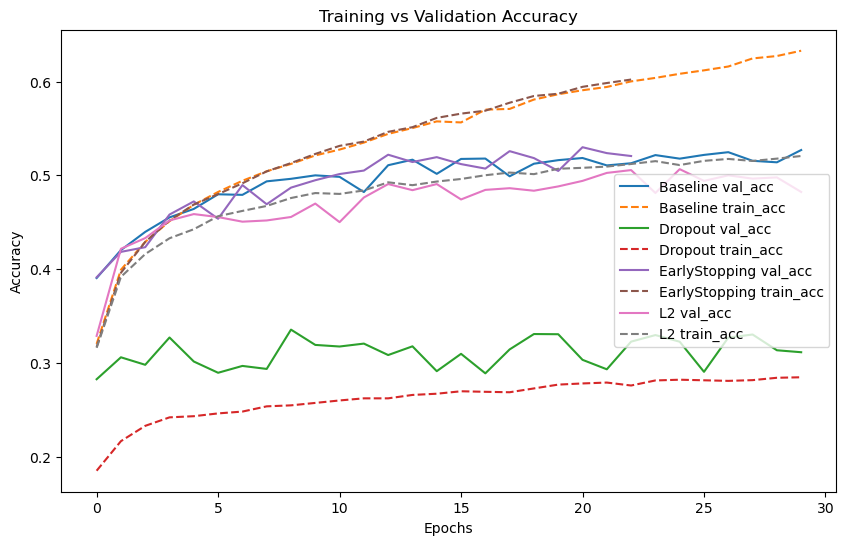

In [7]:
def plot_history(histories, title="Training vs Validation Accuracy"):
    plt.figure(figsize=(10,6))
    for name, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=f"{name} val_acc")
        plt.plot(history.history['accuracy'], linestyle="--", label=f"{name} train_acc")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

plot_history({
    "Baseline": history_baseline,
    "Dropout": history_dropout,
    "EarlyStopping": history_early,
    "L2": history_l2
})

### Step 7: Report Validation Accuracy

In [8]:
models_results = {
    "Baseline": baseline_model.evaluate(x_test, y_test, verbose=0)[1],
    "Dropout": dropout_model.evaluate(x_test, y_test, verbose=0)[1],
    "EarlyStopping": early_model.evaluate(x_test, y_test, verbose=0)[1],
    "L2": l2_model.evaluate(x_test, y_test, verbose=0)[1]
}

print("Validation Accuracies:")
for k,v in models_results.items():
    print(f"{k}: {v:.4f}")

Validation Accuracies:
Baseline: 0.5270
Dropout: 0.3114
EarlyStopping: 0.5258
L2: 0.4823


## Task Is Done ! 